In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [60]:
df = pd.read_csv('ADNOC_Stock_historical_Data.csv')

In [61]:
def describe_column(data, column):
    print("Mean:", data[column].mean())
    print("Median:", data[column].median())
    print("Minimum:", data[column].min())
    print("Maximum:", data[column].max())
    print("Standard Deviation:", data[column].std())


In [62]:
describe_column(df, 'Close')


Mean: 3.5301319875776396
Median: 3.72
Minimum: 2.16
Maximum: 4.93
Standard Deviation: 0.7962292044673486


In [63]:
sample_random = df.sample(150)
describe_column(sample_random, 'Close')


Mean: 3.455333333333333
Median: 3.63
Minimum: 2.16
Maximum: 4.69
Standard Deviation: 0.8017436255832102


In [64]:
sample_systematic = df.iloc[::10]   
describe_column(sample_systematic, 'Close')


Mean: 3.5306976744186045
Median: 3.74
Minimum: 2.19
Maximum: 4.88
Standard Deviation: 0.7945135953510639


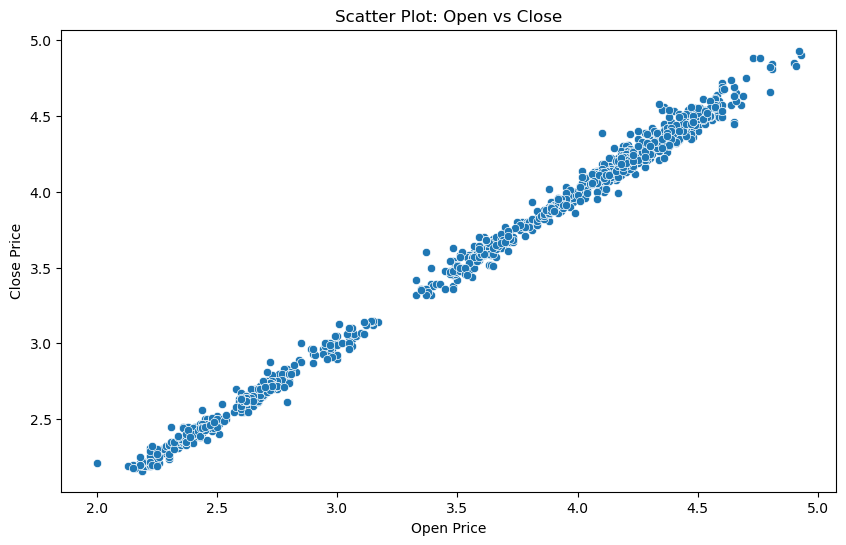

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1) Scatter Plot: Open vs Close

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Scatter Plot: Open vs Close')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()


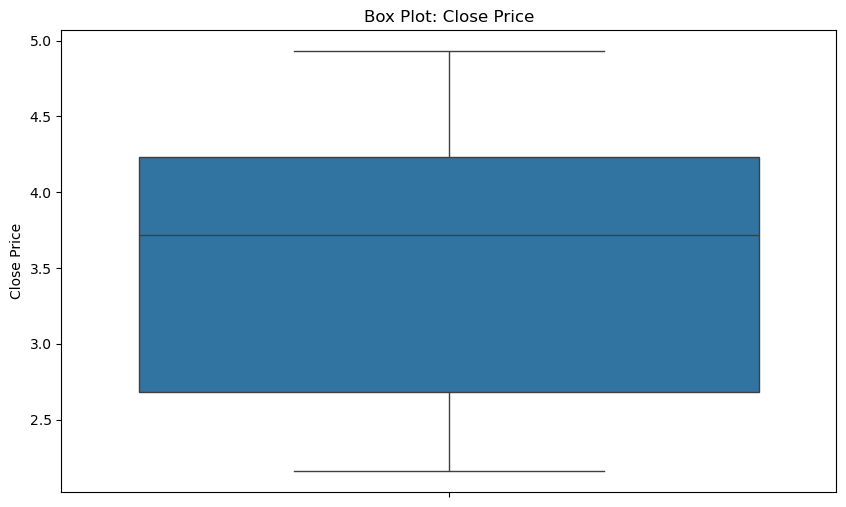

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
#  Box Plot: Close Price (Outlier check)
plt.figure(figsize=(10, 6))
sns.boxplot(y='Close', data=df)
plt.title('Box Plot: Close Price')
plt.ylabel('Close Price')
plt.show()

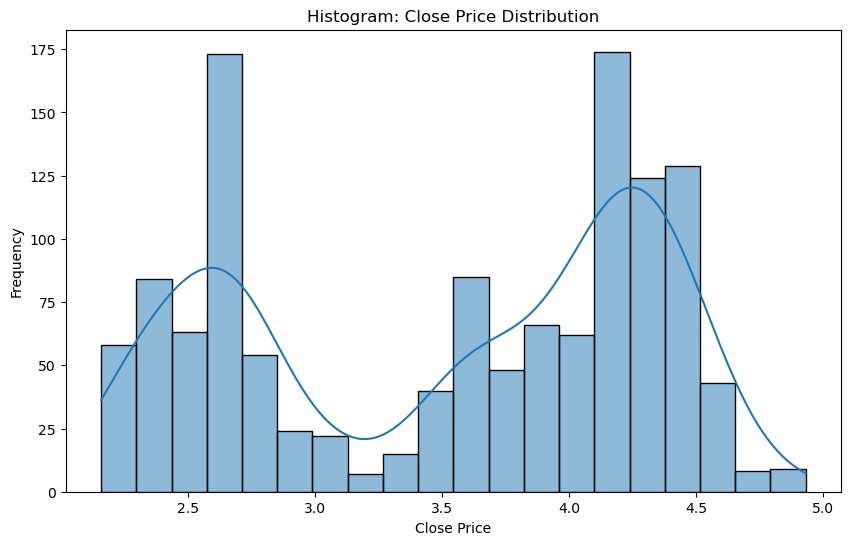

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# 3) Histogram: Distribution of the Close Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Histogram: Close Price Distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

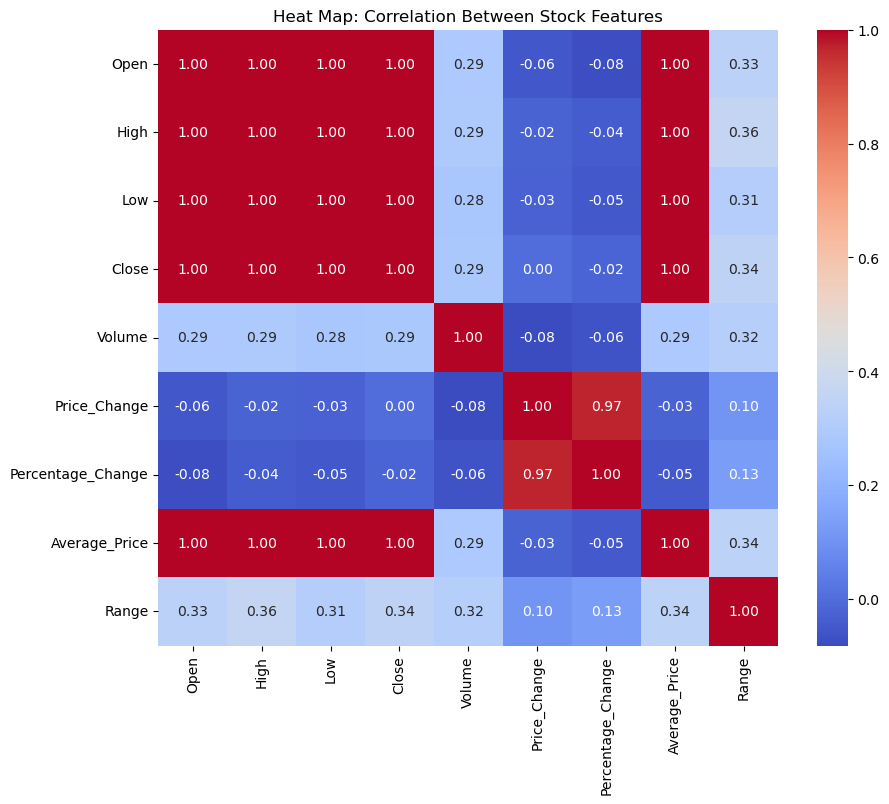

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
# 4) Heat Map: Correlation Between All Numeric Columns
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat Map: Correlation Between Stock Features')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from scipy.stats import pearsonr
corr_value, p_value = pearsonr(df['Open'], df['Close'])
print(corr_value)
print(p_value)

0.9983034159241074
0.0


In [ ]:
from scipy.stats import ttest_1samp

population_mean = df['Close'].mean()
t_stat, p_val = ttest_1samp(sample_random['Close'], population_mean)
print(t_stat)
print(p_val)

# clo3

X = dataset[['Open']].values      # independent variable
y = dataset['Close'].values       # dependent variable
print(X)
print(y)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

y_pred = simple_model.predict(X_test)


In [75]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Q13) Simple Regression: Close ~ Open")
print("Intercept:", simple_model.intercept_)
print("Slope (Open):", simple_model.coef_[0])
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Q13) Simple Regression: Close ~ Open
Intercept: 0.006999972507656604
Slope (Open): 0.9979900877905253
Mean Squared Error: 0.0028816610286023577
R-squared: 0.9955384481931292


In [76]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = regressor.predict(X_test)
print(y_pred)

[2.18261836 2.35227668 4.24845785 3.58978439 3.63968389 3.7694226
 4.79735239 2.19259826 4.8971514  3.6895834  4.42809606 4.37819656
 4.32829705 3.55984469 2.23251787 4.17859854 4.13867894 4.29835735
 2.621734   4.19855834 4.10873923 4.29835735 2.28241737 2.70157321
 2.621734   2.30237717 2.6317139  2.15267866 4.54785487 4.17859854
 4.06881963 4.38817646 2.38221638 2.67163351 2.82133202 4.29835735
 2.6416938  4.37819656 3.7195231  2.29239727 4.20853824 2.621734
 2.6317139  4.19855834 4.39815636 3.57980449 2.65167371 3.729503
 2.69159331 4.41811616 3.49996528 4.11871913 2.65167371 3.58978439
 4.46801566 3.7195231  4.63767398 2.68161341 4.16861864 4.64765388
 4.36821666 4.08877943 2.95107073 3.10076924 2.68161341 4.19855834
 3.93908092 4.65763378 4.09875933 4.02890003 2.32233698 4.44805586
 4.59775438 4.09875933 3.15066875 3.82930201 4.14865884 3.51992508
 2.44209579 3.88918141 4.53787497 4.16861864 4.00894022 4.11871913
 2.22253797 4.34825685 4.02890003 4.03887993 2.65167371 4.35823676


In [78]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9955384481931292


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.05193e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Comparison of Regression Models:
                              Model  Mean Squared Error  R-squared
0                 Linear Regression        1.442723e-28   1.000000
1  Polynomial Regression (Degree 2)        6.119685e-02   0.896341
2                  Ridge Regression        1.182506e-04   0.999800
3                  Lasso Regression        3.782500e-02   0.935930
4            Elastic Net Regression        1.350329e-02   0.977127

Best-Fit Model: Linear Regression
R-squared: 1.0
Mean Squared Error: 1.4427232924354516e-28

Regression Equation for Linear Regression:
Close = 0.0000 + (1.0000)*Open + (-0.0000)*High + (0.0000)*Low + (-0.0000)*Volume + (1.0000)*Price_Change + (0.0000)*Percentage_Change + (0.0000)*Average_Price + (0.0000)*Range 


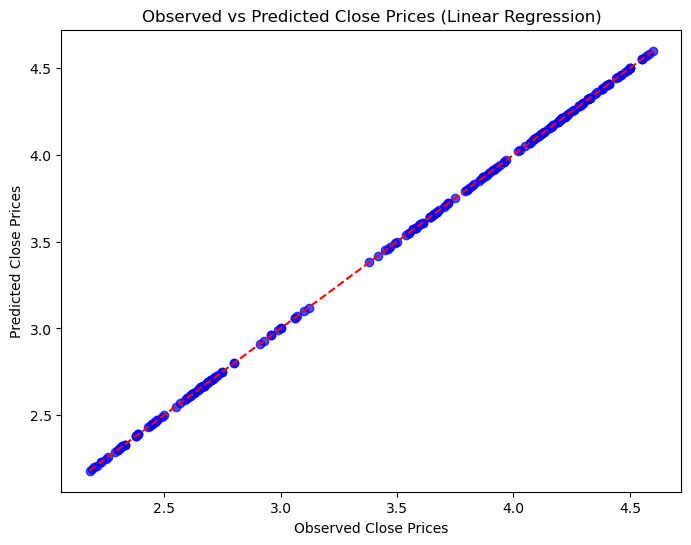

In [115]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'ADNOC_Stock_historical_Data.csv'  # Update path if needed
data = pd.read_csv(file_path)

# Select relevant columns and preprocess the data
filtered_data = data[['Open', 'High', 'Low', 'Close', 'Volume',
                      'Price_Change', 'Percentage_Change',
                      'Average_Price', 'Range']].copy()

# Fill missing values with column means
filtered_data = filtered_data.fillna(filtered_data.mean())

# Detect Outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_list = []
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    outliers_list.append(detect_outliers(filtered_data, col))

outliers = pd.concat(outliers_list).drop_duplicates()

# Remove outliers from the dataset
filtered_data_no_outliers = filtered_data[~filtered_data.index.isin(outliers.index)]

# Define independent variables (X) and target variable (y)
X = filtered_data_no_outliers[['Open', 'High', 'Low', 'Volume',
                               'Price_Change', 'Percentage_Change',
                               'Average_Price', 'Range']]
y = filtered_data_no_outliers['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree 2)": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net Regression": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Polynomial Features for Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Results storage
results = []
predicted_values = {}

# Evaluate each model
for name, model in models.items():
    if "Polynomial" in name:
        model.fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "Mean Squared Error": mse, "R-squared": r2})
    predicted_values[name] = y_pred

# Create a DataFrame for results
comparison_results = pd.DataFrame(results)

# Identify the best-fit model based on R-squared
best_model_name = comparison_results.loc[
    comparison_results['R-squared'].idxmax(), 'Model'
]
best_model_r2 = comparison_results.loc[
    comparison_results['R-squared'].idxmax(), 'R-squared'
]
best_model_mse = comparison_results.loc[
    comparison_results['R-squared'].idxmax(), 'Mean Squared Error'
]

print("Comparison of Regression Models:")
print(comparison_results)
print(f"\nBest-Fit Model: {best_model_name}")
print(f"R-squared: {best_model_r2}")
print(f"Mean Squared Error: {best_model_mse}")

# Print Regression Equation for the Best-Fit Model
if best_model_name == "Polynomial Regression (Degree 2)":
    coefficients = models["Polynomial Regression (Degree 2)"].coef_
    intercept = models["Polynomial Regression (Degree 2)"].intercept_
    feature_names = poly_features.get_feature_names_out(X.columns)
    print("\nPolynomial Regression Equation (Degree 2):")
    equation = f"Close = {intercept:.4f} "
    for coef, feature in zip(coefficients, feature_names):
        equation += f"+ ({coef:.4f})*{feature} "
    print(equation)
else:
    best_model = models[best_model_name]
    intercept = best_model.intercept_
    coefficients = best_model.coef_
    print(f"\nRegression Equation for {best_model_name}:")
    equation = f"Close = {intercept:.4f} "
    for coef, feature in zip(coefficients, X.columns):
        equation += f"+ ({coef:.4f})*{feature} "
    print(equation)

# Plot Observed vs. Predicted values for the best model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values[best_model_name], alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],
         color='red', linestyle="--")
plt.title(f"Observed vs Predicted Close Prices ({best_model_name})")
plt.xlabel("Observed Close Prices")
plt.ylabel("Predicted Close Prices")
plt.show()


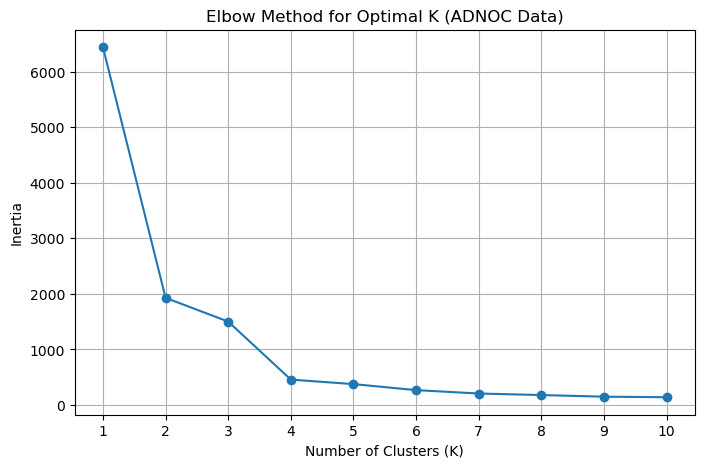

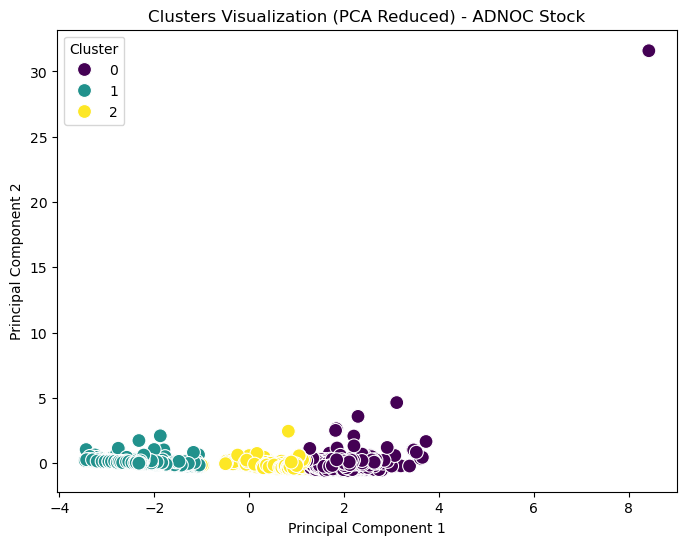

Cluster Centers (Scaled Data):
[[ 0.97169441  0.97236853  0.97258765  0.97440724  0.30940271]
 [-1.19777633 -1.19686992 -1.1971112  -1.19620331 -0.33249795]
 [ 0.21207262  0.20912966  0.20912621  0.20391927 -0.01943336]]

Cluster Statistics (Original Features):
             Open      High       Low     Close        Volume
Cluster                                                      
0        4.304925  4.337790  4.265281  4.306180  1.437774e+07
1        2.574917  2.598485  2.557324  2.578050  2.083421e+06
2        3.699963  3.726618  3.665257  3.693713  8.061399e+06


In [110]:
# Importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'ADNOC_Stock_historical_Data.csv'   # Your dataset
df = pd.read_csv(file_path)

# Select relevant features for clustering (you can change the list if you want)
data = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data = data.fillna(data.mean())  # Fill missing values with column mean

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)  # Test for 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualize the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title("Elbow Method for Optimal K (ADNOC Data)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Apply K-means with the chosen number of clusters (for example, K=3)
k = 3  # Replace with the K you choose from the elbow plot
kmeans = KMeans(n_clusters=k, random_state=1)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clusters using PCA (reduce to 2 dimensions)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100)
plt.title("Clusters Visualization (PCA Reduced) - ADNOC Stock")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Optional: View cluster centers and basic statistics for each cluster
print("Cluster Centers (Scaled Data):")
print(kmeans.cluster_centers_)
print("\nCluster Statistics (Original Features):")
print(data.groupby('Cluster')[['Open', 'High', 'Low', 'Close', 'Volume']].mean())

